#Email account Risk Scoring with Machine Learning on Open Source Intelligence data (OSINT)  

This notebook aims to demonstrate the process of building a machine learning model that classifies emails into 'Spam' and 'Ham' categories using text processing techniques.

*Note: This Python code was executed on Google Colab, and I highly recommend using Colab for better display and performance.

**Importing Basic Libraries and Packages**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Punctuations
import string
# Pandas
import pandas as pd
# Stopwords
from nltk.corpus import stopwords
# Regular Expressions
import re
# Import PorterStemmer from NLTK Library
from nltk.stem.porter import PorterStemmer
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrix and Train Test
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Loading the Dataset and Data Exploration


In this section, we will load our dataset and conduct a thorough data exploration. This process will help us gain valuable insights into the structure and characteristics of the data, allowing us to better understand the underlying patterns and relationships that will inform our model-building approach.

In [ ]:
# Loading Dataset
df = pd.read_csv('/content/mail_data.csv')

In [ ]:
# Head Of  Data
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [ ]:
# Tail of Data
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [ ]:
print(df.describe())

       Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30


In [ ]:
# Get unique values of Categorical values
unique_values = df['Category'].unique()

print(unique_values)

['ham' 'spam']


In [ ]:
#  Value counts of the column Category
print(df.Category.value_counts())

Category
ham     4825
spam     747
Name: count, dtype: int64


               Category Distribution               


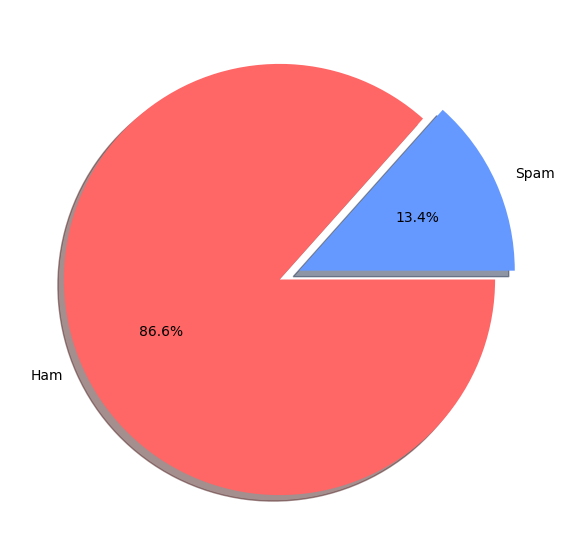

In [ ]:
#Pie Chart demonstrating the Target Distribution
import numpy as np
import matplotlib.pyplot as plt

MAP = {'spam': 'Spam', 'ham': 'Ham'}
df_mapped = df.copy()
df_mapped['Category'] = df_mapped['Category'].map(MAP)
explode = np.zeros(len(MAP))
explode[-1] = 0.1

colors = ['#ff6666', '#6699ff']

# Print the title in bold
print('\033[1mCategory Distribution'.center(55))

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(df_mapped['Category'].value_counts(),
        labels=df_mapped['Category'].value_counts().index,
        counterclock=False,
        shadow=True,
        explode=explode,
        colors=colors,
        autopct='%1.1f%%',
        radius=1,
        startangle=0)

# Display the chart
plt.show()


In [ ]:
# Null Values
print(f'Null Values in Train Dataset is : {df.isnull().sum().sum()}')

Null Values in Train Dataset is : 0


In [ ]:
# Null Values Columns
df.isnull().sum()

,0
Category,0
Message,0


Our Dataset Contains No Null Values

In [ ]:
# Duplicates
print(f"Duplicates values in Train Dataset is : {df.duplicated().sum()}")

Duplicates values in Train Dataset is : 415


The dataset contains duplicates, we will drop all the duplicates.

In [ ]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Lets Check Some Text
print(df['Message'][0])
print(df['Message'][1])
print(df['Message'][2])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


# Text Processing


In this section, we will clean and encode the text data in the 'Message' column, transforming it into a suitable format for model fitting. This preprocessing step is crucial for ensuring that the machine learning model can effectively learn from and classify the email content.

In [ ]:
# 1. LowerCase
df['Message'] = df['Message'].str.lower()

# Head
df.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In the follwing steps, we will preprocess the text data by removing punctuation, special characters like '@' and '#', and URLs to clean up the content. Additionally, we'll filter out common chat words to ensure the text is more standardized and relevant for our model training.

In [ ]:
# 2. Remove # tag from Train Datasets
df['Message'] = df['Message'].str.replace('#','')

In [ ]:
# 3. Remove @ From Train and Test Text
df['Message'] = df['Message'].str.replace('@','')

In [ ]:
# 4. Remove URLs from Test and Train Text
df['Message'] = df['Message'].str.replace(r'^https?:\/\/.*[\r\n]*','')

In [ ]:
# 5. Removing Punctuations
import string
df['Message'] = df['Message'].str.translate(str.maketrans('', '', string.punctuation))

# Head
df.head()

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


We'll download the necessary NLTK resources, including 'punkt' for tokenization, 'stopwords' for removing common words, 'wordnet' for lemmatization, and stemming tools to reduce words to their root forms.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# 6. Intilize Stopwords
stop_words = stopwords.words('english')

# Apply Stopwords
df['Message'] = df['Message'].apply(lambda x : ' '.join([word for word in x.split()if word not in (stop_words)]))

# Head
df.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


In [ ]:
# Here Come ChatWords Which i got from a Github Repository: https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [ ]:
# 7. Handling ChatWords
# Function
def chat_conversion(text):
    new_text = []
    for i in text.split():
        if i.upper() in chat_words:
            new_text.append(chat_words[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

# Calling Function
df['Message'] = df['Message'].apply(chat_conversion)

# Head
df.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif You oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,You dun say early hor You c already say
4,ham,nah dont think goes usf lives around though


We have applied tokenization to break the text into individual words or tokens, enabling more detailed analysis in subsequent steps.

In [ ]:
# 8. Tokenization
from nltk.tokenize import sent_tokenize

# Apply sent_tokenize
df['text_sent_token'] = df['Message'].apply(sent_tokenize)

# Head
df.head()

,Category,Message,text_sent_token
0,ham,go jurong point crazy available bugis n great ...,[go jurong point crazy available bugis n great...
1,ham,ok lar joking wif You oni,[ok lar joking wif You oni]
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,[free entry 2 wkly comp win fa cup final tkts ...
3,ham,You dun say early hor You c already say,[You dun say early hor You c already say]
4,ham,nah dont think goes usf lives around though,[nah dont think goes usf lives around though]


In [ ]:
# 9. Stemming

# Intilize Stemmer
stemmer = PorterStemmer()

# This Function Will Stem Words
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

# Calling
df['stem_msg'] = df['Message'].apply(stem_words)

# Head
df.head()

,Category,Message,text_sent_token,stem_msg
0,ham,go jurong point crazy available bugis n great ...,[go jurong point crazy available bugis n great...,go jurong point crazi avail bugi n great world...
1,ham,ok lar joking wif You oni,[ok lar joking wif You oni],ok lar joke wif you oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,[free entry 2 wkly comp win fa cup final tkts ...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,You dun say early hor You c already say,[You dun say early hor You c already say],you dun say earli hor you c alreadi say
4,ham,nah dont think goes usf lives around though,[nah dont think goes usf lives around though],nah dont think goe usf live around though


#Data Encoding


Data encoding is necessary because machine learning models can only process numerical data. By converting text or categorical data into numbers, we allow the model to interpret and learn from the input effectively. This step also ensures consistency and helps the model recognize patterns, ultimately improving its ability to make accurate predictions. Without encoding, non-numeric data would be unusable in the model training process.

We've used a CountVectorizer to convert the stemmed messages into numerical features and applied LabelEncoder to encode the target column for model training.

In [ ]:
# Intlize CountVectorizer
cv = CountVectorizer()

# Fitting CountVectorizer on X
X = cv.fit_transform(df['stem_msg']).toarray()

In [ ]:
# Shape Of X
X.shape

(5157, 8082)

In [ ]:
# y
y = df['Category']

In [ ]:
# Shape of Y
y.shape

(5157,)

In [ ]:
# Intilize Enocder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fitting Encoder
y = le.fit_transform(y)

# Y Values
y

array([0, 0, 1, ..., 0, 0, 0])

#Data Splitting


We will split the data into training, validation, and test sets. First, we'll perform an initial split to separate out 20% of the data as the test set. Then, we'll further split the remaining data into training and validation sets, ensuring the validation set comprises 20% of the original dataset.

In [ ]:
from sklearn.model_selection import train_test_split

# Initial Train-Test split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further split Train-Val set into Train and Validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Note: The test_size=0.25 for the second split is chosen to make the validation set 20% of the original dataset.


# Model Fitting and Evaluation


For each model, we began by initializing the model with appropriate parameters. We then performed hyperparameter tuning using GridSearchCV, allowing us to identify the optimal settings for each model based on accuracy. After selecting the best hyperparameters, the models were trained on the training data and subsequently evaluated on both the validation and test sets.

The evaluation process involved making predictions on the validation set to assess model performance, followed by predictions on the test set to ensure generalization to unseen data. We focused on key metrics such as accuracy and precision to determine the effectiveness of each model. Finally, we generated a classification report to provide a detailed breakdown of the model’s performance on the test data.

**1. Support Vector Classifier(SVC)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score

# Initialize SVC model
svc_clf = SVC()

# Fit the model on the training data
svc_clf.fit(X_train, y_train)

# Predictions on the validation set
svc_val_preds = svc_clf.predict(X_val)

# Calculate accuracy on the validation set
svc_val_accuracy = accuracy_score(y_val, svc_val_preds)
print("SVC Validation Accuracy:", svc_val_accuracy)

# Calculate precision on the validation set
svc_val_precision = precision_score(y_val, svc_val_preds, average='binary')
print("SVC Validation Precision:", svc_val_precision)

# Predictions on the test set
svc_test_preds = svc_clf.predict(X_test)

# Calculate accuracy on the test set
svc_test_accuracy = accuracy_score(y_test, svc_test_preds)
print("SVC Test Accuracy:", svc_test_accuracy)

# Calculate precision on the test set
svc_test_precision = precision_score(y_test, svc_test_preds, average='binary')
print("SVC Test Precision:", svc_test_precision)

# Generate and print classification report on the test set
class_report = classification_report(y_test, svc_test_preds)
print("Classification Report on Test Data:\n", class_report)


SVC Validation Accuracy: 0.9622093023255814
SVC Validation Precision: 1.0
SVC Test Accuracy: 0.9651162790697675
SVC Test Precision: 1.0
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       897
           1       1.00      0.73      0.85       135

    accuracy                           0.97      1032
   macro avg       0.98      0.87      0.91      1032
weighted avg       0.97      0.97      0.96      1032



**2. Logistic Regression Classifier**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score

# Initialize Logistic Regression model
logistic_clf = LogisticRegression(max_iter=1000, random_state=42)

# Perform Grid Search on the train-validation set
logistic_param_grid = {'C': [0.001, 0.01, 0.1, 1]}
logistic_grid_search = GridSearchCV(logistic_clf, logistic_param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the train-validation data
logistic_grid_search.fit(X_train_val, y_train_val)

# Get the best estimator from grid search
logistic_clf = logistic_grid_search.best_estimator_

# Fit the best model on the training data
logistic_clf.fit(X_train, y_train)

# Predictions on the validation set
logistic_val_preds = logistic_clf.predict(X_val)

# Calculate accuracy on the validation set
logistic_val_accuracy = accuracy_score(y_val, logistic_val_preds)
print("Logistic Regression Validation Accuracy:", logistic_val_accuracy)

# Calculate precision on the validation set
logistic_val_precision = precision_score(y_val, logistic_val_preds, average='binary')
print("Logistic Regression Validation Precision:", logistic_val_precision)

# Predictions on the test set
logistic_test_preds = logistic_clf.predict(X_test)

# Calculate accuracy on the test set
logistic_test_accuracy = accuracy_score(y_test, logistic_test_preds)
print("Logistic Regression Test Accuracy:", logistic_test_accuracy)

# Calculate precision on the test set
logistic_test_precision = precision_score(y_test, logistic_test_preds, average='binary')
print("Logistic Regression Test Precision:", logistic_test_precision)

# Generate and print classification report on the test set
class_report = classification_report(y_test, logistic_test_preds)
print("Classification Report on Test Data:\n", class_report)


Logistic Regression Validation Accuracy: 0.9689922480620154
Logistic Regression Validation Precision: 0.9818181818181818
Logistic Regression Test Accuracy: 0.9718992248062015
Logistic Regression Test Precision: 0.9732142857142857
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       897
           1       0.97      0.81      0.88       135

    accuracy                           0.97      1032
   macro avg       0.97      0.90      0.93      1032
weighted avg       0.97      0.97      0.97      1032



**3. Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score

# Initialize Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)

# Perform Grid Search on the train-validation set
dt_param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the train-validation data
dt_grid_search.fit(X_train_val, y_train_val)

# Get the best estimator from grid search
dt_clf = dt_grid_search.best_estimator_

# Fit the best model on the training data
dt_clf.fit(X_train, y_train)

# Predictions on the validation set
dt_val_preds = dt_clf.predict(X_val)

# Calculate accuracy on the validation set
dt_val_accuracy = accuracy_score(y_val, dt_val_preds)
print("Decision Tree Validation Accuracy:", dt_val_accuracy)

# Calculate precision on the validation set
dt_val_precision = precision_score(y_val, dt_val_preds, average='binary')
print("Decision Tree Validation Precision:", dt_val_precision)

# Predictions on the test set
dt_test_preds = dt_clf.predict(X_test)

# Calculate accuracy on the test set
dt_test_accuracy = accuracy_score(y_test, dt_test_preds)
print("Decision Tree Test Accuracy:", dt_test_accuracy)

# Calculate precision on the test set
dt_test_precision = precision_score(y_test, dt_test_preds, average='binary')
print("Decision Tree Test Precision:", dt_test_precision)

# Generate and print classification report on the test set
class_report = classification_report(y_test, dt_test_preds)
print("Classification Report on Test Data:\n", class_report)


Decision Tree Validation Accuracy: 0.939922480620155
Decision Tree Validation Precision: 0.8725490196078431
Decision Tree Test Accuracy: 0.9486434108527132
Decision Tree Test Precision: 0.847457627118644
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       897
           1       0.85      0.74      0.79       135

    accuracy                           0.95      1032
   macro avg       0.90      0.86      0.88      1032
weighted avg       0.95      0.95      0.95      1032



**4. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score

# Initialize Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Perform Grid Search on the train-validation set
rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the train-validation data
rf_grid_search.fit(X_train_val, y_train_val)

# Get the best estimator from grid search
rf_clf = rf_grid_search.best_estimator_

# Fit the best model on the training data
rf_clf.fit(X_train, y_train)

# Predictions on the validation set
rf_val_preds = rf_clf.predict(X_val)

# Calculate accuracy on the validation set
rf_val_accuracy = accuracy_score(y_val, rf_val_preds)
print("Random Forest Validation Accuracy:", rf_val_accuracy)

# Calculate precision on the validation set
rf_val_precision = precision_score(y_val, rf_val_preds, average='binary')
print("Random Forest Validation Precision:", rf_val_precision)

# Predictions on the test set
rf_test_preds = rf_clf.predict(X_test)

# Calculate accuracy on the test set
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)
print("Random Forest Test Accuracy:", rf_test_accuracy)

# Calculate precision on the test set
rf_test_precision = precision_score(y_test, rf_test_preds, average='binary')
print("Random Forest Test Precision:", rf_test_precision)

# Generate and print classification report on the test set
class_report = classification_report(y_test, rf_test_preds)
print("Classification Report on Test Data:\n", class_report)


Random Forest Validation Accuracy: 0.9641472868217055
Random Forest Validation Precision: 0.9902912621359223
Random Forest Test Accuracy: 0.9670542635658915
Random Forest Test Precision: 1.0
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       897
           1       1.00      0.75      0.86       135

    accuracy                           0.97      1032
   macro avg       0.98      0.87      0.92      1032
weighted avg       0.97      0.97      0.96      1032



**Lets Represent the Results as a Table**:

1. Accuracy and Precision of Validation Sets

In [ ]:
# Create a dictionary with evaluation results
evaluation_data = {
    'Model': ['SVC', 'Decision Tree', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [svc_val_accuracy, dt_val_accuracy, logistic_val_accuracy, rf_val_accuracy],
    'Precision': [svc_val_precision, logistic_val_precision, dt_val_precision, rf_val_precision]
}

# Create a dataframe
evaluation_df = pd.DataFrame(evaluation_data)

# Sort the dataframe based on Accuracy and Precision columns in descending order
evaluation_df = evaluation_df.sort_values(by=['Accuracy'], ascending=False)

# Display the sorted dataframe
evaluation_df


,Model,Accuracy,Precision
2,Logistic Regression,0.968992,0.872549
3,Random Forest,0.964147,0.990291
0,SVC,0.962209,1.000000
1,Decision Tree,0.939922,0.981818


2. Accuracy and Precision of Test Set

In [ ]:
import pandas as pd

# Create a dictionary with evaluation results for the test data
evaluation_data = {
    'Model': ['SVC', 'Decision Tree', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [svc_test_accuracy, dt_test_accuracy, logistic_test_accuracy, rf_test_accuracy],
    'Precision': [svc_test_precision, dt_test_precision, logistic_test_precision, rf_test_precision]
}

# Create a dataframe
evaluation_df = pd.DataFrame(evaluation_data)

# Sort the dataframe based on Accuracy in descending order
evaluation_df = evaluation_df.sort_values(by=['Accuracy'], ascending=False)

# Display the sorted dataframe
evaluation_df


,Model,Accuracy,Precision
2,Logistic Regression,0.971899,0.973214
3,Random Forest,0.967054,1.000000
0,SVC,0.965116,1.000000
1,Decision Tree,0.948643,0.847458


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Define the Logistic Regression model
logistic_clf = LogisticRegression(max_iter=1000, random_state=42)

# Define the hyperparameter grid
logistic_param_grid = {'C': [0.001, 0.01, 0.1, 1]}

# Set up GridSearchCV with 5-fold cross-validation
logistic_grid_search = GridSearchCV(logistic_clf, logistic_param_grid, cv=5, scoring='accuracy')

# Set up k-fold cross-validation (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with GridSearchCV
logistic_cross_val_scores = cross_val_score(logistic_grid_search, X_train_val, y_train_val, cv=cv, scoring='accuracy')

# Output cross-validation scores and average accuracy
print(f"Cross-validation accuracy for each fold: {logistic_cross_val_scores}")
print(f"Average cross-validation accuracy: {np.mean(logistic_cross_val_scores)}")


Cross-validation accuracy for each fold: [0.9769697  0.97333333 0.97212121 0.96969697 0.97333333]
Average cross-validation accuracy: 0.973090909090909


In [ ]:
from sklearn.metrics import classification_report

# Extract F1-score for SVC model
svc_class_report = classification_report(y_test, svc_test_preds, output_dict=True)
svc_f1_score = svc_class_report['1']['f1-score']

# Extract F1-score for Logistic Regression model
logistic_class_report = classification_report(y_test, logistic_test_preds, output_dict=True)
logistic_f1_score = logistic_class_report['1']['f1-score']

# Extract F1-score for Decision Tree model
dt_class_report = classification_report(y_test, dt_test_preds, output_dict=True)
dt_f1_score = dt_class_report['1']['f1-score']

# Extract F1-score for Random Forest model
rf_class_report = classification_report(y_test, rf_test_preds, output_dict=True)
rf_f1_score = rf_class_report['1']['f1-score']

# F1-scores for all models
f1_scores = [svc_f1_score, logistic_f1_score, dt_f1_score, rf_f1_score]
model_names = ["SVC", "Logistic Regression", "Decision Tree", "Random Forest"]

# Print the results
for model, f1_score in zip(model_names, f1_scores):
    print(f"{model} F1-Score: {f1_score}")


SVC F1-Score: 0.846153846153846
Logistic Regression F1-Score: 0.8825910931174089
Decision Tree F1-Score: 0.7905138339920947
Random Forest F1-Score: 0.8559322033898306


# Visualising The Results


In [ ]:
import plotly.graph_objects as go

# Define the models and their accuracies and precisions
models = ['SVC', 'Decision Tree', 'Logistic Regression', 'Random Forest']
accuracies = [svc_val_accuracy, dt_val_accuracy, logistic_val_accuracy, rf_val_accuracy]
precisions = [svc_val_precision, dt_val_precision, logistic_val_precision, rf_val_precision]

# Create the figure
fig = go.Figure()

# Add bar traces for accuracy and precision
fig.add_trace(go.Bar(
    x=models,
    y=accuracies,
    name='Accuracy',
    marker_color='skyblue'
))
fig.add_trace(go.Bar(
    x=models,
    y=precisions,
    name='Precision',
    marker_color='salmon'
))

# Update layout
fig.update_layout(
    title='Accuracy and Precision of Different Models',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Score'),
    barmode='group'  # Group bars for each model
)

# Show the plot
fig.show()

In [ ]:
import plotly.graph_objects as go

# Define the models and their accuracies and precisions for the test data
models = ['SVC', 'Decision Tree', 'Logistic Regression', 'Random Forest']
accuracies = [svc_test_accuracy, dt_test_accuracy, logistic_test_accuracy, rf_test_accuracy]
precisions = [svc_test_precision, dt_test_precision, logistic_test_precision, rf_test_precision]

# Create the figure
fig = go.Figure()

# Add bar traces for accuracy and precision
fig.add_trace(go.Bar(
    x=models,
    y=accuracies,
    name='Accuracy',
    marker_color='skyblue'
))
fig.add_trace(go.Bar(
    x=models,
    y=precisions,
    name='Precision',
    marker_color='salmon'
))

# Update layout
fig.update_layout(
    title='Accuracy and Precision of Different Models on Test Data',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Score'),
    barmode='group'  # Group bars for each model
)

# Show the plot
fig.show()


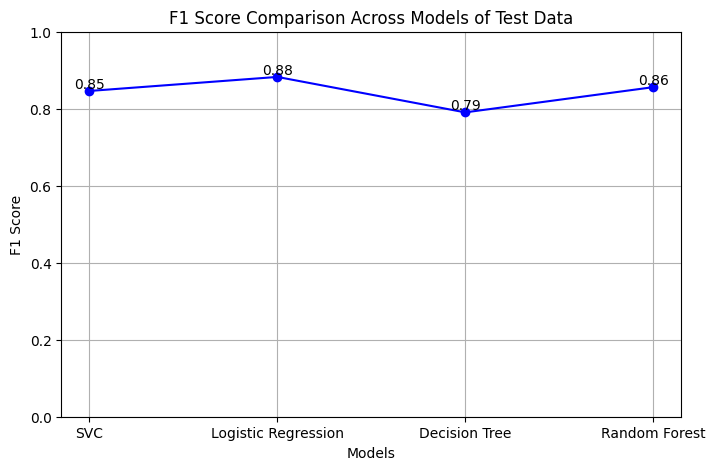

In [ ]:
import matplotlib.pyplot as plt

# F1-scores for all models
f1_scores = [svc_f1_score, logistic_f1_score, dt_f1_score, rf_f1_score]
model_names = ["SVC", "Logistic Regression", "Decision Tree", "Random Forest"]

# Create a line plot with data points
plt.figure(figsize=(8, 5))
plt.plot(model_names, f1_scores, marker='o', linestyle='-', color='b', label='F1 Score')

# Add labels and title
plt.title('F1 Score Comparison Across Models of Test Data')
plt.xlabel('Models')
plt.ylabel('F1 Score')

# Show the F1 score values at each data point
for i, f1_score in enumerate(f1_scores):
    plt.text(i, f1_score, f"{f1_score:.2f}", ha='center', va='bottom')

# Add grid and display the plot
plt.grid(True)
plt.ylim(0, 1)  # Set limits for the y-axis to be between 0 and 1
plt.show()


#Real time Application Example

The following code cells demonstrates the application of the trained Logistic Regression model in detecting spam emails. The vectorized text is then passed through the trained model to predict whether the email is spam (1) or legitimate (0). Based on the prediction, the result is printed as either "Spam" or "Ham". You can replace the sample_email text to test different emails.

In [ ]:
# Sample email to classify
sample_email = "Subject: Claim your free iPhone today! Congratulations! Youve been selected as the lucky winner of a brand new iPhone! Click the link below to claim your prize now. Dont miss out on this limited-time offer![Claim your iPhone](http://spamlink.com) Act fast before this offer expires!"

# Transform the sample email using the fitted CountVectorizer
vectorized_email = cv.transform([sample_email]).toarray()

# Use the trained Logistic Regression model to predict
prediction = logistic_clf.predict(vectorized_email)

# Output the classification result
result = 'Spam' if prediction == 1 else 'Ham'
print(f"The email is classified as: {result}")


The email is classified as: Spam


In [ ]:
# Sample email to classify
sample_email = "Subject: Meeting Agenda for Tomorrow Hi Team, Just a quick reminder about our meeting scheduled for tomorrow at 10 AM. Please find the agenda attached, and make sure to review the documents before the meeting. Looking forward to your inputs. Best regards, John"

# Transform the sample email using the fitted CountVectorizer
vectorized_email = cv.transform([sample_email]).toarray()

# Use the trained Logistic Regression model to predict
prediction = logistic_clf.predict(vectorized_email)

# Output the classification result
result = 'Spam' if prediction == 1 else 'Ham'
print(f"The email is classified as: {result}")


The email is classified as: Ham


# References

1. Dataset Reference:
Reference: Gowtham, G. (2023) 'Email Spam Classifier', Kaggle. Available at: https://www.kaggle.com/code/imgowthamg/email-spam-classifier/input (Accessed: 3 September 2024).

2. Specific Code References:
Specific portions of the code were adapted from the following sources:

*Plotly: Interactive visualizations were created using plotly.graph_objects, which is known for its advanced and customizable graphing capabilities (Plotly, 2023). Available at: https://plotly.com/python/graph-objects/ [Accessed 3 September 2024].

*NLTK (Natural Language Toolkit): Employed for text processing, including stopword removal and tokenization (Bird, Loper, and Klein, 2009). Available at: https://www.nltk.org/ [Accessed 3 September 2024].

*Regular Expressions (re): Applied for text preprocessing and pattern matching (Python Software Foundation, 2024). Available at: https://docs.python.org/3/library/re.html [Accessed 3 September 2024].

3. Personal Contributions and Course Material:
The majority of the code implemented in this project is derived from my previous coursework and personal study. The concepts and techniques were learned through the following libraries and tools:

*Pandas: Used extensively for data manipulation and analysis (McKinney, 2010). Available at: https://pandas.pydata.org/ [Accessed 3 September 2024].

*NumPy: For numerical computations and handling arrays (Harris et al., 2020). Available at: https://numpy.org/ [Accessed 3 September 2024].

*Matplotlib: Utilized for creating basic visualizations (Hunter, 2007). Available at: https://matplotlib.org/stable/contents.html [Accessed 3 September 2024].

*Scikit-learn: Used for building machine learning models and feature extraction (Pedregosa et al., 2011). Available at: https://scikit-learn.org/stable/ [Accessed 3 September 2024].

*Seaborn: Applied for statistical data visualization, especially for creating more complex plots (Waskom, 2021). Available at: https://seaborn.pydata.org/ [Accessed 3 September 2024].